In [15]:
#项目3-项目实施代码

#导入鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


#提取特征，划分数据集
x,y=load_iris().data[:,2:4],load_iris().target    #提取花瓣长度与花瓣宽度作为特征，训练模型
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=50) #将数据集拆分为训练集与测试集

In [16]:
#导入逻辑回归模型与评估分类准确率的方法
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#定义与训练逻辑回归模型
model=LogisticRegression()	    #建立逻辑回归模型
model.fit(x_train,y_train)		#训练模型

#模型评估
ac=accuracy_score(y_test,model.predict(x_test))
print("模型预测准确率：",ac)

模型预测准确率： 0.98


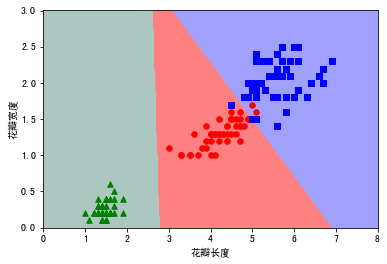

In [17]:
#导入Matplotlib与NumPy库
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

#绘制分类界面
N,M=500,500                  #网格采样点的个数，采样点越多，分类界面图越精细
t1=np.linspace(0,8,N)        #生成采样点的横坐标值
t2=np.linspace(0,3,M)        #生成采样点的纵坐标值
x1,x2=np.meshgrid(t1,t2)     #生成网格采样点
x_new=np.stack((x1.flat,x2.flat),axis=1)  #将采样点作为测试点
y_predict=model.predict(x_new)  #预测测试点的值
y_hat=y_predict.reshape(x1.shape) #与x1设置相同的形状
iris_cmap=ListedColormap(["#ACC6C0","#FF8080","#A0A0FF"])                   #设置分类界面的颜色
plt.pcolormesh(x1,x2,y_hat,cmap=iris_cmap)                                    #绘制分类界面

#绘制3种类别鸢尾花的样本点
plt.scatter(x[y==0,0],x[y==0,1],s=30,c='g',marker='^')	#绘制标签为0的样本点
plt.scatter(x[y==1,0],x[y==1,1],s=30,c='r',marker='o')	#绘制标签为1的样本点
plt.scatter(x[y==2,0],x[y==2,1],s=30,c='b',marker='s')	#绘制标签为2的样本点

#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'	#中文文字设置为黑体
plt.xlabel('花瓣长度')						#图形横轴的标签名称
plt.ylabel('花瓣宽度')						#图形纵轴的标签名称
plt.show()							#显示图形
